In [1]:
#使用預處理來提取更有意義的特徵。這裏使用主成份分析來提取150個基本元素，然後將其提供給支持向量機分類器。
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics

data=pd.read_csv('G:/學校相關作業/人工智慧/期末報告_預測加速度/predict_1000.csv',engine='python')
att=data.iloc[0:,:6]
RealPGA=data.iloc[0:,6:]
RealPGA = np.array(RealPGA, dtype=int)

In [2]:
#決策樹參數說明:https://www.cnblogs.com/pinard/p/6056319.html
model=LinearRegression(fit_intercept=True,normalize=True,copy_X=True,n_jobs=1)

In [4]:
#爲了測試分類器的訓練效果，將數據集分解成訓練集和測試集進行交叉檢驗
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(att,
                                                RealPGA,
                                                random_state=42,
                                                test_size = 0.3)

In [5]:
'''#用網絡搜索交叉檢驗來尋找最優參數組合。
from sklearn.model_selection import GridSearchCV
param_grid ={"fit_intercept": ['True','False'],
             "normalize":['True','False']}
grid = GridSearchCV(model,param_grid)

grid.fit(Xtrain, ytrain)
print(grid.best_params_)'''

{'fit_intercept': 'True', 'normalize': 'True'}


In [6]:
#有了交叉檢驗的模型，現在就可以對測試集的數據進行預測了
#model = grid.best_estimator_
model.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

In [7]:
#模型分數

def mean_absolute_percentage_error(y_true,y_pred):
    y_true,y_pred=np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

print('Anns的R sqaure:',metrics.r2_score(ytest,yfit))
print('Anns的MAPE:',mean_absolute_percentage_error(ytest,yfit))
print('Anns的MAE:',metrics.mean_absolute_error(ytest,yfit))
print('Anns的MSE:',metrics.mean_squared_error(ytest,yfit))
print('Anns的RMSE:',np.sqrt(metrics.mean_squared_error(ytest,yfit)))

Anns的R sqaure: -65.005721879
Anns的MAPE: 73.7998494223
Anns的MAE: 28.3345861527
Anns的MSE: 93537.3949343
Anns的RMSE: 305.838838172


C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1441: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)
C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\pyplot.py:1478: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


<function matplotlib.pyplot.show(*args, **kw)>

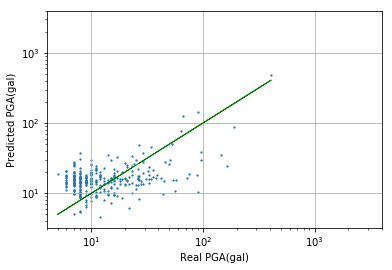

In [8]:
import matplotlib.pyplot as plt
x=ytest
y=yfit
plt.scatter(x,y, s=1.5,alpha=1)
plt.plot(x,x,color='green', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.xlabel('Real PGA(gal)')
plt.ylabel('Predicted PGA(gal)')
plt.grid()
plt.show